# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (20,20)

# EDA

In [2]:
data = pd.read_csv("/content/UCI_Credit_Card.csv")
df = data.copy()

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
df.shape

(30000, 25)

In [6]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
df.rename(columns={'PAY_0':'PAY_1', 'default.payment.next.month':'DEFAULT'}, inplace=True)

In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

# Visualizations

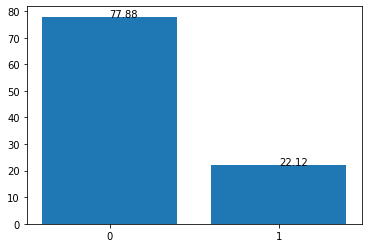

In [9]:
x = sorted(df.DEFAULT.unique())
y = df.DEFAULT.value_counts(normalize=True)*100
# print(x, y)
plt.bar(x, y.values)
plt.xticks(x)
plt.text(x[0], y.values[0], round(y.values[0], 2))
plt.text(x[1], y.values[1], round(y.values[1], 2))
plt.show()

**Data consists of 77.88% people who will not default and 22.12% who will default.**

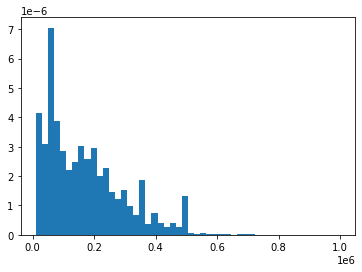

In [10]:
plt.hist(df.LIMIT_BAL, bins=50, density=True)
plt.show()

**Histogram distribution of Amount of Credit given.**

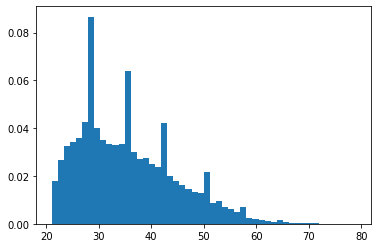

In [11]:
plt.hist(df.AGE, bins=50, density=True)
plt.show()

**Histogram distribution of Age of credit card holders.**

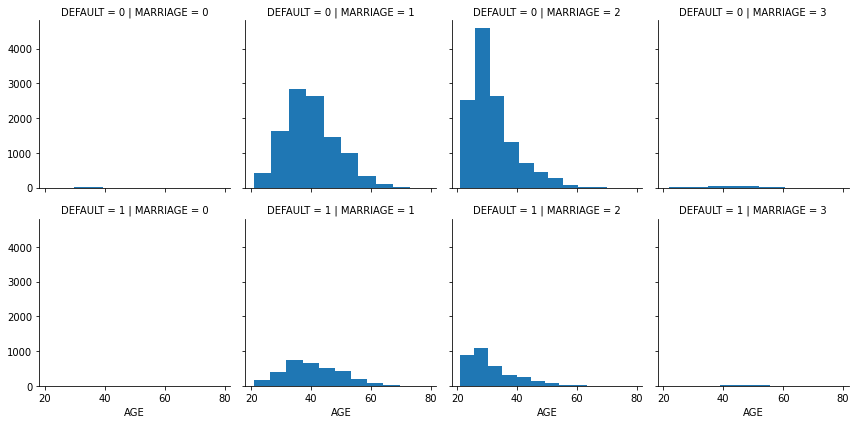

In [12]:
g = sns.FacetGrid(df, row='DEFAULT', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

**This plot shows that certain age group and marriage status are related to defaulting payments.**

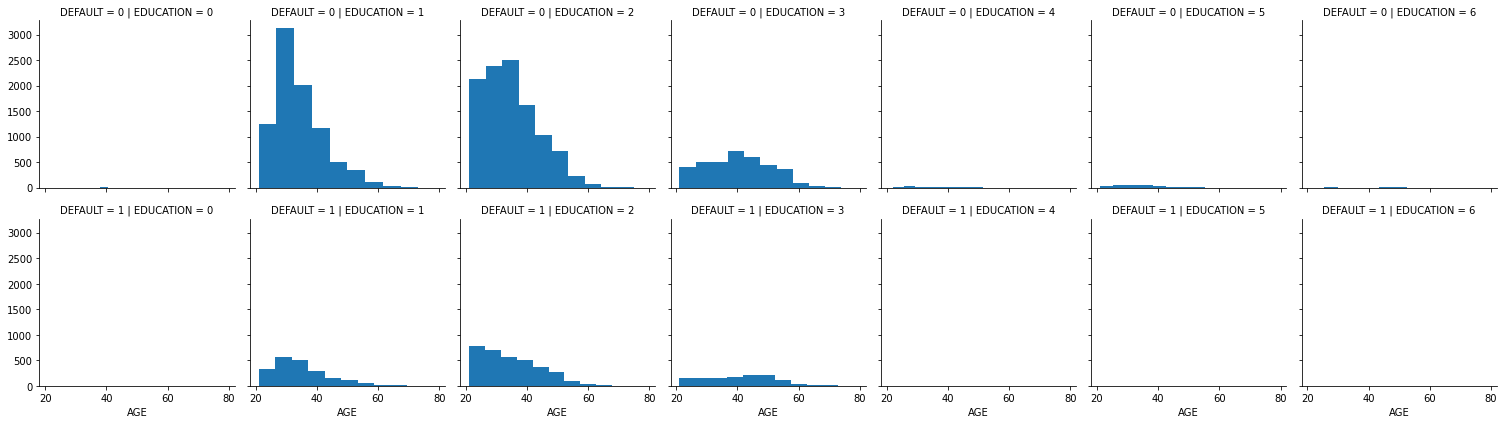

In [13]:
g = sns.FacetGrid(df, row='DEFAULT', col='EDUCATION')
g = g.map(plt.hist, 'AGE')
plt.show()

**This plot shows that certain age group and education levels are related to defaulting payments.**

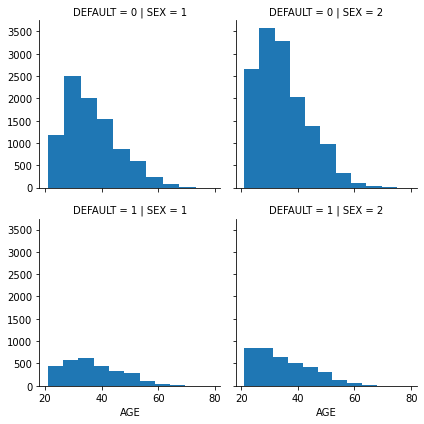

In [14]:
g = sns.FacetGrid(df, row='DEFAULT', col='SEX')
g = g.map(plt.hist, 'AGE')
plt.show()

**This plot shows that certain age group and sex of the clients are related to defaulting payments.**

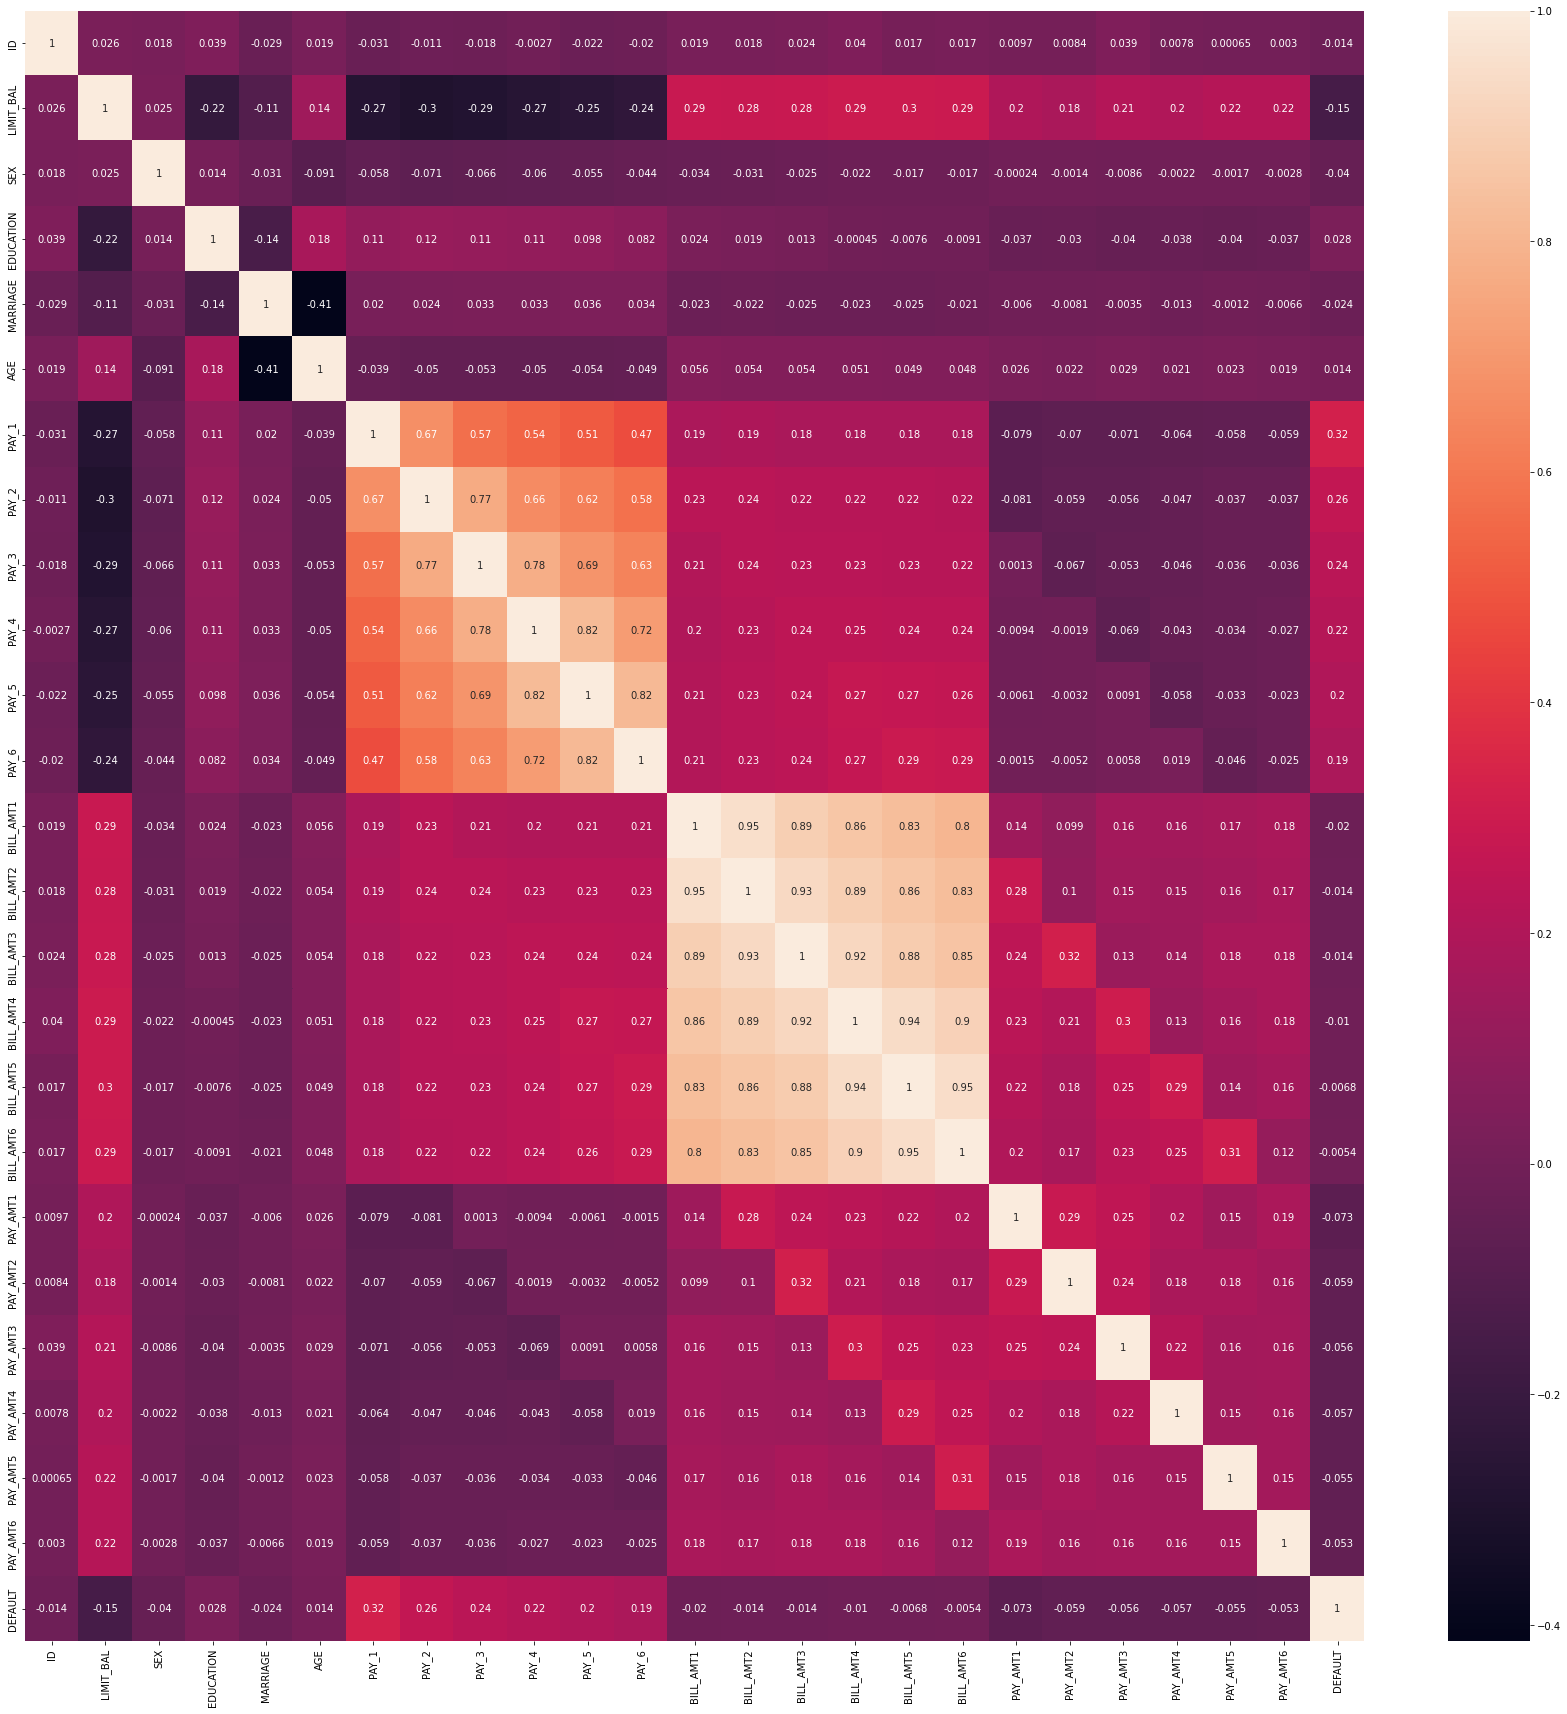

In [15]:
plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)
plt.show()

**We observer high multicollinearity between features (coeff >= 0.5):**
* **PAY_1 and PAY_2 to PAY_6**
* **BILL_AMT1 and BILL_AMT2 to BILL_AMT6**



# Model

In [16]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [17]:
df_X = df.iloc[:, :-1]
df_y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('\nAccuracy Score for model: ', round(accuracy_score(y_pred,y_test)*100, 2))


Accuracy Score for model:  78.02


In [18]:
df_X = df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
        'BILL_AMT1', 'BILL_AMT2',
        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
df_y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('\nAccuracy Score for model: ', round(accuracy_score(y_pred,y_test)*100, 2))


Accuracy Score for model:  78.02


In [19]:
df_X = df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
        'BILL_AMT1', 'PAY_AMT1',
        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
df_y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('\nAccuracy Score for model: ', round(accuracy_score(y_pred,y_test)*100, 2))


Accuracy Score for model:  78.05


In [20]:
df_X = df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
        'BILL_AMT1', 'PAY_AMT1',
        ]]
df_y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('\nAccuracy Score for model: ', round(accuracy_score(y_pred,y_test)*100, 2))


Accuracy Score for model:  78.05


In [21]:
df_X = df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
        'BILL_AMT1', 'PAY_AMT1',
        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
df_y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model = RidgeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('\nAccuracy Score for model: ', round(accuracy_score(y_pred,y_test)*100, 2))


Accuracy Score for model:  79.4


In [22]:
df_X = df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
        'BILL_AMT1', 'PAY_AMT1',
        ]]
df_y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model = RidgeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('\nAccuracy Score for model: ', round(accuracy_score(y_pred,y_test)*100, 2))


Accuracy Score for model:  79.48


In [23]:
df_X = df.iloc[:, :-1]
df_y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('\nAccuracy Score for model: ', round(accuracy_score(y_pred,y_test)*100, 2))


Accuracy Score for model:  72.6


In [24]:
df_X = df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
        'BILL_AMT1', 'PAY_AMT1',
        ]]
df_y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('\nAccuracy Score for model: ', round(accuracy_score(y_pred,y_test)*100, 2))


Accuracy Score for model:  71.58


**Best Model --> Ridge Classifier with removed multi-collinearity features (PAY_2 .. PAY_6, BILL_AMT2 .. BILL_AMT6, and PAY_AMT2 .. PAY_AMT6) with almost 79.5% Accuracy.**